In [20]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', 50)

In [3]:
directory_path = '../data/raw/'

fname = "Georgia Milestones Scores.csv"

fpath = os.path.join(directory_path, fname)

In [ ]:
df = pd.read_csv(fpath, encoding="utf-8", low_memory=False)


<bound method NDFrame.describe of         GeorgiaMilestonesId  GeorgiaMilestonesAchievementLevelId  \
0                   1362898                                    1   
1                   1362899                                    2   
2                   1362900                                    4   
3                   1362901                                    2   
4                   1362902                                    1   
...                     ...                                  ...   
382319              2226954                                    1   
382320              2226955                                    1   
382321              2226956                                    1   
382322              2226957                                    2   
382323              2226958                                    2   

                              SubjectDesc  SchoolYearId  \
0                               Algebra I            32   
1       American Literature & C

In [21]:
df.head()

,GeorgiaMilestonesId,GeorgiaMilestonesAchievementLevelId,SubjectDesc,SchoolYearId,AssessmentAdministrationWindowId,AssessmentAdministrationWindowDesc,TestingDateId,StudentPersonKey_mask,SchoolDetailFCSId,SchoolId,ScaleScore,AchievementLevel,GradeConversionScore,LexileScore,ReadingIndicatorMetFlag,TestGrade,NRT_NP,ActiveFactGeorgiaMilestonesRecordFlag,ExtendedWritingT1Score,ExtendedWritingT2Score,NarrativeWritingResponse,ExtendedWritingPromptGenre,StudentGrowthPercentileFinal,StudentGrowthLevel,Assmnt_Sci,NRTNP_Range,Retest_Flag
0,1362898,1,Algebra I,32,5,Fall MM,11319,356119,804,143,421,1,54.0,0.0,NaN,11,0.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362899,2,American Literature & Composition,32,5,Fall MM,11319,217864,852,78,497,2,73.0,1165.0,0.0,11,0.0,Y,3.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1362900,4,American Literature & Composition,32,5,Fall MM,11319,237883,852,78,597,4,92.0,1800.0,1.0,12,0.0,Y,2.0,2.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
3,1362901,2,Algebra I,32,5,Fall MM,11319,236191,852,78,493,2,72.0,0.0,NaN,12,0.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1362902,1,Biology,32,5,Fall MM,11319,196546,852,78,464,1,65.0,0.0,NaN,11,0.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382324 entries, 0 to 382323
Data columns (total 27 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   GeorgiaMilestonesId                    382324 non-null  int64  
 1   GeorgiaMilestonesAchievementLevelId    382324 non-null  int64  
 2   SubjectDesc                            382324 non-null  object 
 3   SchoolYearId                           382324 non-null  int64  
 4   AssessmentAdministrationWindowId       382324 non-null  int64  
 5   AssessmentAdministrationWindowDesc     382324 non-null  object 
 6   TestingDateId                          382324 non-null  int64  
 7   StudentPersonKey_mask                  382324 non-null  int64  
 8   SchoolDetailFCSId                      382324 non-null  int64  
 9   SchoolId                               382324 non-null  int64  
 10  ScaleScore                             382324 non-null  

- GeorgiaMilestonesId: Primary key
- GeorgiaMilestonesAchievementLevelId: 4 unique values
- SubjectDesc:
- SchoolYearId: 
- AssessmentAdministrationWindowId: 'Fall MM', 'Winter'...
- AssessmentAdministrationWindowDesc:
- TestingDateId
- StudentPersonKey_mask: Student ID
- SchoolDetailFCSId: 118 unique values: schools within fulton county
- SchoolId: 118 unique values
- ScaleScore
- AchievementLevel: 1,2,3,4
- GradeConversionScore: 0-->100
- LexileScore: Reading indicator (0 --> 1800)
- ReadingIndicatorMetFlag: Binary
- TestGrade: 3->12
- NRT_NP: Norm-referenced test - national percentile (0 and nan.)
- ExtendedWritingT1Score: 0->4
- ExtendedWritingT2Score: 0->3
- NarrativeWritingResponse: 0->4
- ExtendedWritingPromptGenre: 1->3
- StudentGrowthPercentileFinal: 0->100
- NarrativeWritingResponse: 0--->4
- StudentGrowthLevel: High/Medium/Low
- Assmnt_Sci: Assessment Science Score: 0,1,2
- NRTNP_Range
- Retest_Flag:


In [74]:
df["NRTNP_Range"].nunique()

1070

In [76]:
df["Retest_Flag"].unique()

array([nan,  0.,  1.])

In [57]:
df["NRT_NP"].max()

np.float64(0.0)

In [29]:
df.groupby('AchievementLevel').ScaleScore.mean()

AchievementLevel
1    442.015845
2    499.830031
3    553.224770
4    625.725891
Name: ScaleScore, dtype: float64

In [36]:
df[df["GradeConversionScore"] == df["GradeConversionScore"].max()]["ScaleScore"]

53        750
224965    785
225525    785
225772    750
225930    765
         ... 
380849    750
381159    765
381560    820
381818    820
381819    820
Name: ScaleScore, Length: 226, dtype: int64

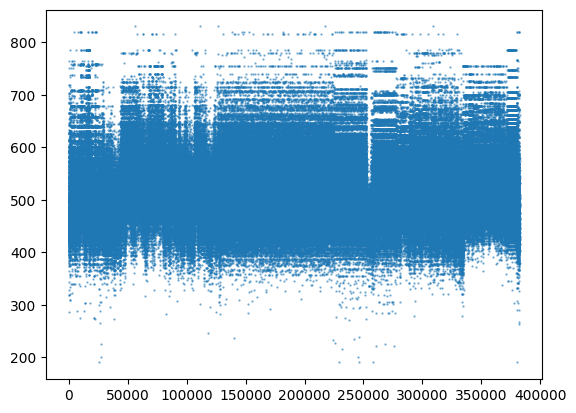

In [41]:
plt.scatter(range(382324), df["ScaleScore"], s=0.5, alpha= 0.5)

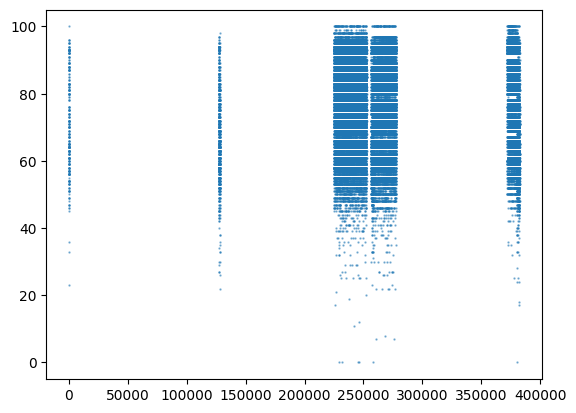

In [42]:
plt.scatter(range(382324), df["GradeConversionScore"], s=0.5, alpha= 0.5)

In [45]:
df[df["ReadingIndicatorMetFlag"] == 1]["LexileScore"]. min()

np.float64(525.0)

In [115]:
directory_path = '../data/raw/'

fname = "GraduationAreaSummary.xlsx"

fpath = os.path.join(directory_path, fname)

df = pd.read_excel(fpath)


In [116]:
df.head()

,mask_studentpersonkey,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded
0,350335,741,115,2023,Math,4,1.5,2.5
1,1946451,870,80,2022,Health/ PersonalFitness,1,0.5,0.5
2,1987664,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0
3,1521002,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5
4,317341,751,74,2021,Social Studies,3,2.5,0.5


In [117]:
df[df["mask_studentpersonkey"] == 1946451]

,mask_studentpersonkey,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded
1,1946451,870,80,2022,Health/ PersonalFitness,1,0.5,0.5
38177,1946451,870,80,2022,ELA,4,2.5,1.5
61382,1946451,870,80,2022,Social Studies,3,1.5,1.5
150646,1946451,870,80,2022,Math,4,2.0,2.0
168494,1946451,870,80,2022,Electives,4,5.0,0.0
172298,1946451,870,80,2022,Science,4,1.5,2.5
173859,1946451,870,80,2022,World Language/ FineArts/ CareerTech,3,5.5,0.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197615 entries, 0 to 197614
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   mask_studentpersonkey      197615 non-null  int64  
 1   CurrentSchoolDetailFCSId   197615 non-null  int64  
 2   SchoolId                   197615 non-null  int64  
 3   SchoolYearNumberFall       197615 non-null  int64  
 4   SubjectArea                197615 non-null  object 
 5   SubjectAreaCreditRequired  197615 non-null  int64  
 6   AreaCredits                197605 non-null  float64
 7   AreaCreditStillNeeded      197605 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 12.1+ MB


In [84]:
df["SubjectArea"].unique()

array(['Math', 'Health/ PersonalFitness',
       'World Language/ FineArts/ CareerTech', 'Social Studies', 'ELA',
       'Science', 'Electives'], dtype=object)

In [118]:
directory_path = '../data/processed/'

fname = "StudentTeacherGradeCombined.csv"

fpath = os.path.join(directory_path, fname)

df = pd.read_csv(fpath)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17908\127096967.py:7: DtypeWarning: Columns (0,9,12,13,14,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fpath)


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8502796 entries, 0 to 8502795
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   GradeLevel              object 
 1   SchoolYearId            int64  
 2   SchoolYear              object 
 3   MarkingPeriodCode       object 
 4   MarkingPeriodStartDate  object 
 5   MarkingPeriodEndDate    object 
 6   SchoolDetailFCSId       float64
 7   SchoolStateId           float64
 8   CourseLevelDesc         object 
 9   CourseNumber            object 
 10  CourseDesc              object 
 11  DepartmentDesc          object 
 12  DOECourseNumber         object 
 13  StartPeriodCode         object 
 14  EndPeriodCode           object 
 15  SchoolCourseDesc        object 
 16  AttemptedCredit         float64
 17  EarnedCredit            float64
 18  MarkTypeCode            object 
 19  MarkTypeDesc            object 
 20  Mark                    object 
 21  StaffPersonKey          float64

In [120]:
df.head()

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,CourseDesc,DepartmentDesc,DOECourseNumber,StartPeriodCode,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,mask_studentpersonkey
0,1,32,2021-2022,Q2,2021-10-13 00:00:00.000,2021-12-17 00:00:00.000,380.0,193.0,Level 1,0.000111,Odyssey,MISCELLANEOUS,0.0,5,5,Odyssey,0.0,0.0,S18,Semester,NaN,14906.0,418681.0
1,1,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,155.0,298.0,Level 1,0.8,Sc-Sec,MISCELLANEOUS,0.0,1,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,-1.0,419430.0
2,1,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,601.0,101.0,Level 1,0.8,Sc-Sec,MISCELLANEOUS,0.0,1,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,65356.0,433229.0
3,1,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,324.0,5060.0,Level 1,0.8,Sc-Sec,MISCELLANEOUS,0.0,1,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,29922.0,419002.0
4,1,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,380.0,193.0,Level 1,0.000111,Odyssey,MISCELLANEOUS,0.0,5,5,Odyssey,0.0,0.0,S18,Semester,NaN,14906.0,466709.0


In [121]:
df[(df["mask_studentpersonkey"] == 1946451) & (df["DepartmentDesc"] == "SCIENCE")]

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,CourseDesc,DepartmentDesc,DOECourseNumber,StartPeriodCode,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,mask_studentpersonkey
8150791,11,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,870.0,291.0,Level 1 Non Honors,40.0110001,Physical Science,SCIENCE,40.01100,3,3,Phys Sci,0.5,0.5,S18,Semester,95,27916.0,1946451.0
8150795,11,35,2024-2025,S2,2025-01-07 00:00:00.000,2025-05-22 00:00:00.000,870.0,291.0,Level 1 Non Honors,40.0110002,Physical Science,SCIENCE,40.01100,3,3,Phys Sci,0.5,0.0,S18,Semester,NaN,27916.0,1946451.0


In [122]:
df[df["mask_studentpersonkey"] == 1946451].groupby(["SchoolYear", "DepartmentDesc"])[["AttemptedCredit", "EarnedCredit"]].sum()

AttemptedCredit  \
SchoolYear DepartmentDesc                                                 
2023-2024  CAREER TECHNICAL AND AGRICULTURAL EDUCATION              1.0   
           FINE ARTS                                                0.5   
           LANGUAGE ARTS                                            0.5   
           MATH                                                     0.5   
           MISCELLANEOUS                                            0.0   
           PE/HEALTH                                                1.0   
           SOCIAL SCIENCES                                          0.5   
2024-2025  FINE ARTS                                                1.0   
           HEALTH EDUCATION                                         0.5   
           LANGUAGE ARTS                                            1.5   
           MATH                                                     1.0   
           MISCELLANEOUS                                            0.0   
           PE/HEALTH                                                1.0   
           SCIENCE                                                  1.0   
           SOCIAL SCIENCES                                          2.0   

                                                        EarnedCredit  
SchoolYear DepartmentDesc                                             
2023-2024  CAREER TECHNICAL AND AGRICULTURAL EDUCATION           1.0  
           FINE ARTS                                             0.5  
           LANGUAGE ARTS                                         0.5  
           MATH                                                  0.5  
           MISCELLANEOUS                                         0.0  
           PE/HEALTH                                             1.0  
           SOCIAL SCIENCES                                       0.5  
2024-2025  FINE ARTS                                             0.5  
           HEALTH EDUCATION                                      0.0  
           LANGUAGE ARTS                                         1.0  
           MATH                                                  0.5  
           MISCELLANEOUS                                         0.0  
           PE/HEALTH                                             0.5  
           SCIENCE                                               0.5  
           SOCIAL SCIENCES                                       1.0